# Exception & File & Log Handling

## Exception

- 예상 가능한 예외: case 나눠서 처리
    - 발생 여부를 사전에 인지할 수 있다. 
    - 개발자가 케이스별로 명시적으로 정의해야. 
    - 사용자의 잘못된 입력이나 파일 없음 등
    - LBYL (Look Before You Leap)
- 예상 불가능한 예외: `try ... except`로 통으로 처리
    - 인터프리터 과정에서 발생하는 예외. 
    - 리스트의 범위를 넘어가는 값 호출 등 
    - 대체 어떤 문제가 터질 지 예상할 수 없는 경우
    - EAFP (Easier to Ask Forgiveness than Permission )

EAFP, `try ... except`를 권장하는 PEP-0463가 있다. 

하지만 Guido van Rossum은 reject 했었다. https://www.python.org/dev/peps/pep-0463/

### Exception catching 

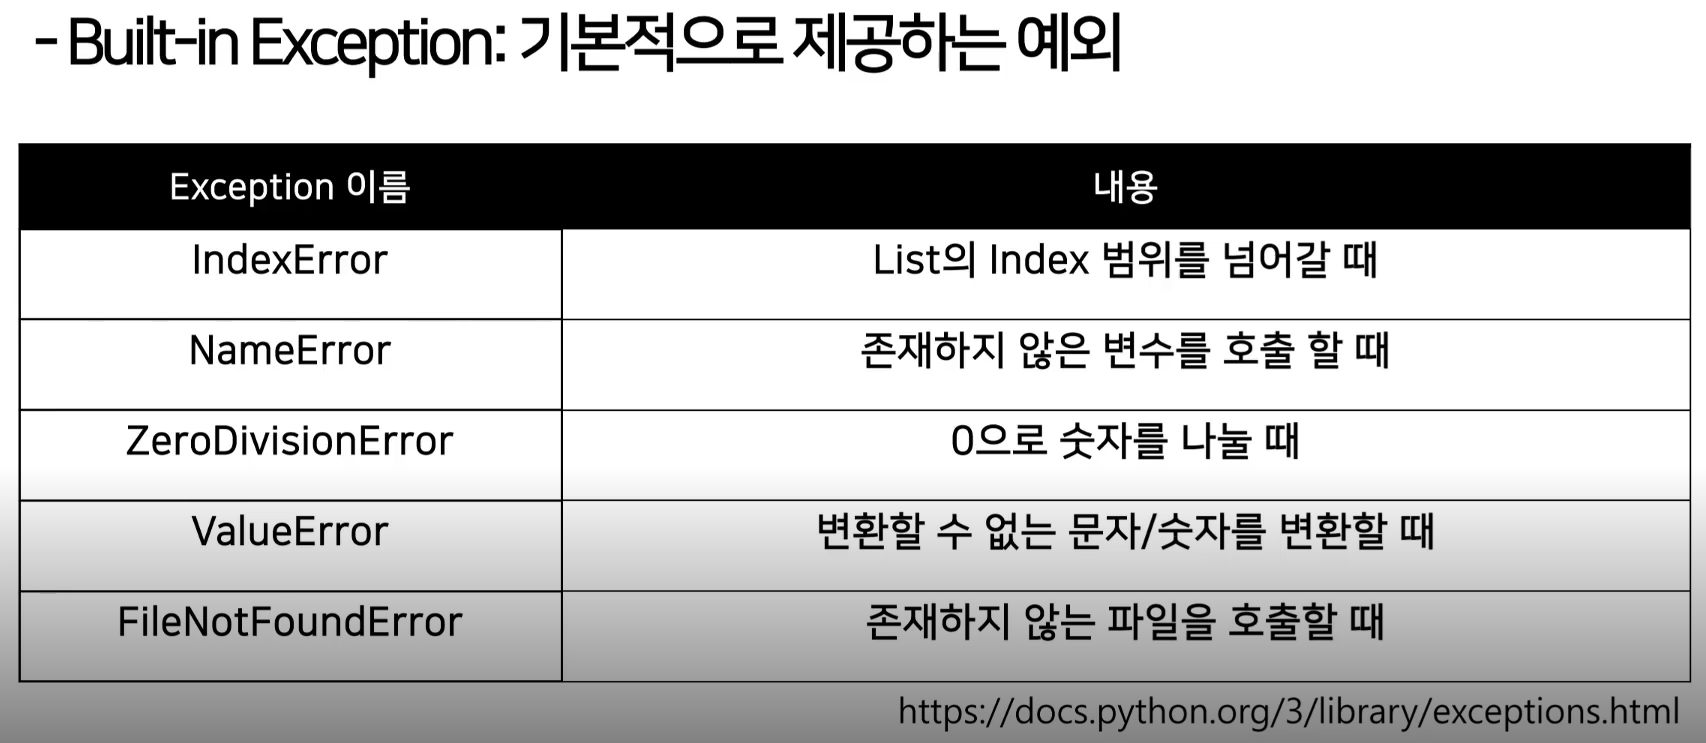

Exception을 예상하여 어떤 exception인지를 나눠서 `except ValueError:`와 같이 해주는 것이 좋다. 


In [13]:
## else도 가능하다. 

foo = [1, 2, 3]

try:
    foo[2] / 0
except ZeroDivisionError:
    print('catch specific error')
except Exception as e:
    print(repr(e))
else: # error 안 일어날 때 실행
    print('no error')

catch specific error
hi


In [14]:
## finally도 가능하다. 

foo = [1, 2, 3]

try:
    foo[7] / 0
except ZeroDivisionError:
    print('catch specific error')
except Exception as e:
    print(repr(e))
finally: # error 일어나든 안일어나든 실행 
    print('no error')

IndexError('list index out of range')
no error


`assert`를 쓸 수도 있다. 

특정조건에 만족하지 않을 경우 예외를 발생시킨다. 

뭔가 잘못 입력하면 엄청 오래 걸리는 작업이 시작되거나 그럴 때 간단한 테스트 개념으로 넣는다. 

In [15]:
def get_binary_number(decimal_number):
    assert isinstance(decimal_number, int) # False가 되면 error 발생. 
    return bin(decimal_number)

In [17]:
get_binary_number(10.1)

AssertionError: 

## File

기본적으로 
- text 파일
- binary 파일

로 나눈다. 

컴퓨터는 text 파일을 처리하기 위해 binary 파일로 변환시킨다. (.pyc 파일처럼) 

모든 text 파일도 사실은 binary 파일이지만 ascii/unicode와 같은 문자열 집합으로 이뤄져 사람이 읽을 수 있다. 

binary 파일은 메모장 등으로 열면 깨져보인다. 엑셀 파일은 그냥 열면 깨져보이고 엑셀에서만 열고 쓸 수 있고 이런데, 이런걸 application 종속적이라고 부른다. 

### File I/O

접근모드를 설정한다. 

`r`, `w`, `a`

#### read

In [20]:
with open('foo.txt', 'r') as f:
    contents = f.readlines() # 모두 한꺼번에 메모리에 올린다. 

In [21]:
contents

['Hello World!\n', 'Goodbye World!']

In [24]:
with open('foo.txt', 'r') as f:
    line = 1
    while line:
        line = f.readline() # 하나씩 메모리에 올린다. 
        print(line)

Hello World!

Goodbye World!



#### write

windows에서는 cp949 뜰 때 많다. 

In [26]:
f = open('foo.txt', 'w', encoding='utf-8')
for i in range(1, 11):
    data = f'{i}번째 줄'
    f.write(data)
f.close()

## directory 다루기 

`os` 모듈 사용

`mkdir`, `isfile`, `os.path.join` 등

In [27]:
import os

In [29]:
try:
    os.mkdir('foo_dir')
except FileExistsError as e:
    print('Already created.')

Already created.


`shutil` 도 사용

`shutil.copy()`로 복사 가능

In [30]:
import shutil

최근에 많이 쓰는 path 관련 library는 따로 있다. 

path를 객체로 다루는 `pathlib`를 쓴다. 



In [31]:
import pathlib

In [34]:
cwd = pathlib.Path.cwd()
cwd

WindowsPath('E:/VSCodeProjects/naver_boost_ai_assignments/naver_ai_lectures')

In [39]:
cwd.parent

WindowsPath('E:/VSCodeProjects/naver_boost_ai_assignments')

## Log 파일 생성하기 

1. 로그 저장할 디렉토리가 있는지, 
2. 그리고 로그 파일이 있는지 확인한 후 

시작해야 한다. 

우선 로그 디렉토리를 만든다. 

In [3]:
from pathlib import Path

try:
    log_dir = Path.cwd() / 'log'
    log_dir.mkdir()
except FileExistsError:
    print('log directory already created.')

log directory already created.


`logging` handling

프로그램이 실행되는 동안 일어나는 일의 기록을 남기기. 

- 유저의 접근
- 프로그램의 exception
- 특정 함수의 사용 
- 등

실행시점에 남겨야 하는 기록 & 개발 시점에 남겨야 하는 기록으로 나뉜다. 

level별(dev, production)으로 남기거나 모듈별로 남겨야 할 수도 있다. 

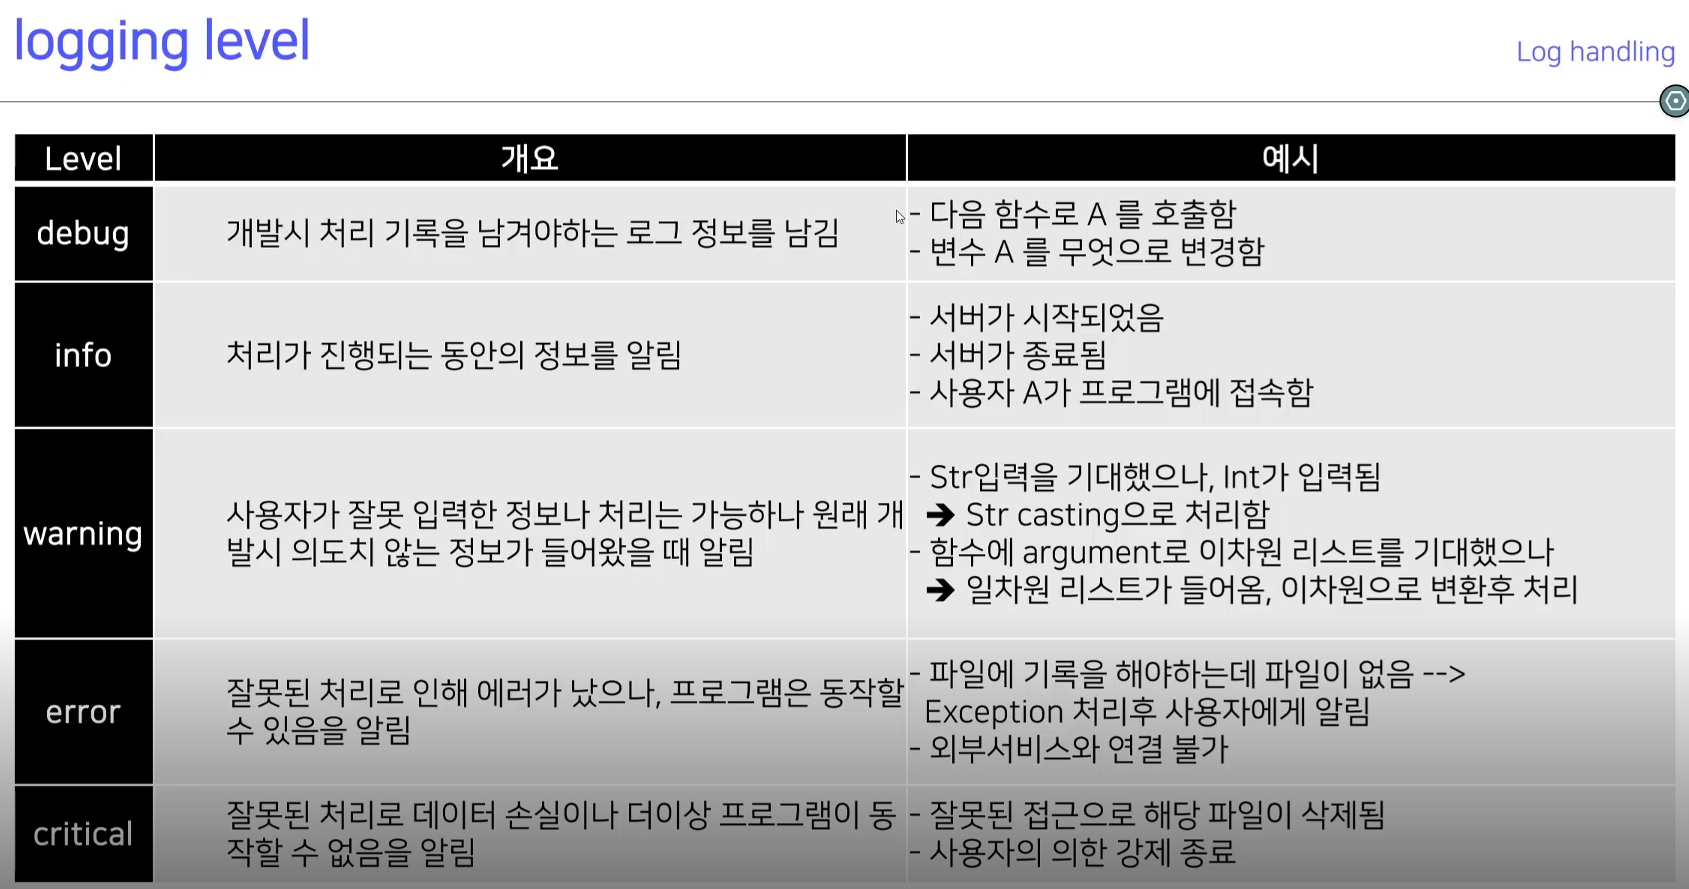

디폴트 level은 warning

deprecation도 warning으로 줌. 

In [3]:
import logging

logging.debug('debug') # 개발시점 
logging.info('info') # 운영시점 
logging.warning('warning') # 여기서부턴 사용자도 볼 수 있다. 여기서부터 표시됨. 
logging.error('error')
logging.critical('critical')

ERROR:root:error
CRITICAL:root:critical


logger를 설정해준다. 

Stream handler는 어디로 출력을 할지 정해주는 것이다.  

In [6]:
logging.basicConfig(level=logging.DEBUG)# 3.8부터 바뀜 

logger = logging.getLogger('main')
logger.setLevel(logging.INFO)

stream_handler = logging.FileHandler(
    'my.log', mode='a', encoding='utf-8'
)
logger.addHandler(stream_handler)

In [7]:
logger.debug('debug')
logger.info('info')
logger.warning('warning')
logger.error('error')
logger.critical('critical')

INFO:main:info
ERROR:main:error
CRITICAL:main:critical


log 결과값의 formatter를 정할 수도 있다. 

format string 쓰는거 아니다. 

In [16]:
formatter = logging.Formatter('%(asctime)s %(levelname)s %(process)d %(message)s')

In [18]:
logging.config.fileConfig('logging.conf') # 나온대로 했는데 안되네. 따로 공부하자. 
logger = logging.getLogger()

AttributeError: module 'logging' has no attribute 'config'

## Pickle

객체는 원래 메모리에 있어야 한다. 

근데 이 객체를 영속화(persistence) 하게 저장하고 싶을 때 쓰는 것이다. 

나중에 불러와서 사용할 수 있게. 

`pickle`은 바이너리 파일이다. 

클래스 같은 것도 pickle시킬 수 있고 데이터도 pickle시킬 수 있고 그렇다. 

In [4]:
import pickle

## `configparser` 

- `configparser` 
    - 실행 설정을 file에 저장
    - section, key, value 값의 형태로 설정된 설정 파일 이용
    - 설정 파일을 dict type으로 호출 후 사용
    
```lang-ini
[SectionOne]
Status: Single
Name: Derek
Value: Yes

[SectionTwo]
FavoriteColor= Green

```

이런 식으로 만든다. 
: 도 되고 = 도 된다. 

In [9]:
import configparser

config = configparser.ConfigParser()
config.read('example_config.cfg')

config.sections()

['SectionOne', 'SectionTwo']

In [10]:
for key in config['SectionOne']:
    value = config['SectionOne'][key]
    print(f'key: {key}, value: {value}')

key: status, value: Single
key: name, value: Derek
key: value, value: Yes


# `argparse`

- `argparse` 
    - 실행 시점에 설정을 준다. 
    - console 창에서 프로그램 실행 시 setting 정보를 저장함. 
    - 거의 모든 console 기반 python 프로그램에 기본으로 있다. 
    - 특수 모듈도 있긴 하지만, 일반적으로 `argparse`를 사용한다. 
    - command line option이라 부른다. 
    

In [11]:
import argparse

parser = argparse.ArgumentParser(description='Sum two integers.')

parser.add_argument('-t', '--time', dest='Set time', help='Time seconds', type=int)

_StoreAction(option_strings=['-t', '--time'], dest='Set time', nargs=None, const=None, default=None, type=<class 'int'>, choices=None, help='Time seconds', metavar=None)

짧은이름 / 긴이름 / 표시명 / help 설명 / argument type 순이다. 

In [12]:
args = parser.parse_args()

usage: ipykernel_launcher.py [-h] [-t SET TIME]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\chlje\AppData\Roaming\jupyter\runtime\kernel-370fc7c2-d485-4263-8cca-72deee3157ff.json


SystemExit: 2

C:\Users\chlje\anaconda3\envs\sandbox38\lib\site-packages\IPython\core\interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
